In [39]:
# Import the necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [40]:
# We need to import the 'weather_energy_merged' csv
starter_df = pd.read_csv('/content/drive/MyDrive/Project_4/Resources/weather_energy_merged.csv')

starter_df.head()

,state,st_abb,date,tmin (f),tmax (f),tavg (f),ppt,coal (kt),natural gas (kMcf),petroleum coke (kt),petroleum liquids (kb)
0,Alabama,AL,2001-01-01,29.1524,51.8234,40.4870,119.501,3076,7802,0,340
1,Arkansas,AR,2001-01-01,26.6612,45.7412,36.2012,88.598,1320,2885,0,222
2,Arizona,AZ,2001-01-01,28.2722,51.9206,40.0964,41.955,1773,7222,0,268
3,California,CA,2001-01-01,31.7372,52.7198,42.2276,87.828,154,106635,94,625
4,Colorado,CO,2001-01-01,11.2748,37.4252,24.3500,25.485,1777,6538,0,52


In [42]:
# Prophet expects only two columns, the DS or datestamp and the X value
# So I need to make a new dataframe

filtered_df = starter_df[starter_df['state']=='Alabama']

# Keep only the relevant columns
filtered_df = filtered_df[['date','coal (kt)']]

# Rename date to DS and coal (kt) to y
filtered_df = filtered_df.rename(columns={'date':'ds','coal (kt)':'y'})

# Ensure the 'DS' column is of datetime type
filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])

filtered_df.head()

,ds,y
0,2001-01-01,3076
48,2001-02-01,2729
96,2001-03-01,2732
144,2001-04-01,2236
192,2001-05-01,2843


In [45]:
# Initalize the Prophet model
model = Prophet(weekly_seasonality=True, yearly_seasonality=True)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model
model.fit(filtered_df)

# Make futuer dataframe for predictions
future = model.make_future_dataframe(periods=730)

# Make predictions
forecast = model.predict(future)

# Check properties of forecast
forecast.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgvklcvuc/w14omcb0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgvklcvuc/9klioe88.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94793', 'data', 'file=/tmp/tmpgvklcvuc/w14omcb0.json', 'init=/tmp/tmpgvklcvuc/9klioe88.json', 'output', 'file=/tmp/tmpgvklcvuc/prophet_modelhwjk5ngn/prophet_model-20241204042420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:24:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:24:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,3253.057680,2614.743393,3212.761145,3253.057680,3253.057680,-353.082983,-353.082983,-353.082983,-487.353202,...,17.594043,17.594043,17.594043,116.676176,116.676176,116.676176,0.0,0.0,0.0,2899.974697
1,2001-02-01,3244.074389,2342.874625,2959.992209,3244.074389,3244.074389,-581.068108,-581.068108,-581.068108,-514.831099,...,-10.953681,-10.953681,-10.953681,-55.283328,-55.283328,-55.283328,0.0,0.0,0.0,2663.006281
2,2001-03-01,3235.960449,2368.150205,2964.988267,3235.960449,3235.960449,-578.662924,-578.662924,-578.662924,-294.479489,...,-10.953681,-10.953681,-10.953681,-273.229755,-273.229755,-273.229755,0.0,0.0,0.0,2657.297525
3,2001-04-01,3226.977158,2176.588076,2774.160838,3226.977158,3226.977158,-761.842808,-761.842808,-761.842808,-369.301072,...,-20.784773,-20.784773,-20.784773,-371.756962,-371.756962,-371.756962,0.0,0.0,0.0,2465.134351
4,2001-05-01,3218.283651,2628.521044,3239.862025,3218.283651,3218.283651,-283.725839,-283.725839,-283.725839,-294.479489,...,42.713947,42.713947,42.713947,-31.960298,-31.960298,-31.960298,0.0,0.0,0.0,2934.557812


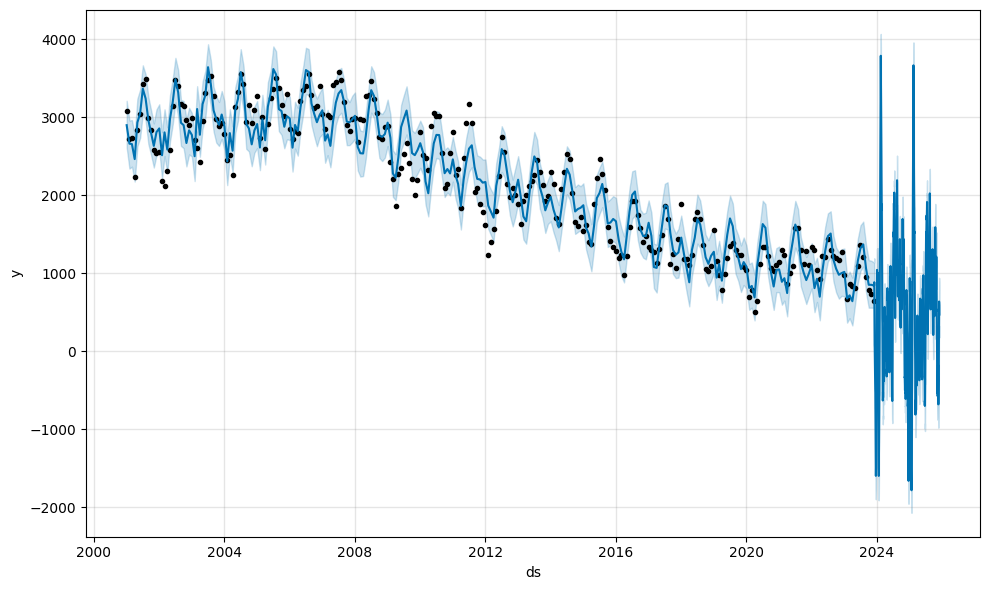

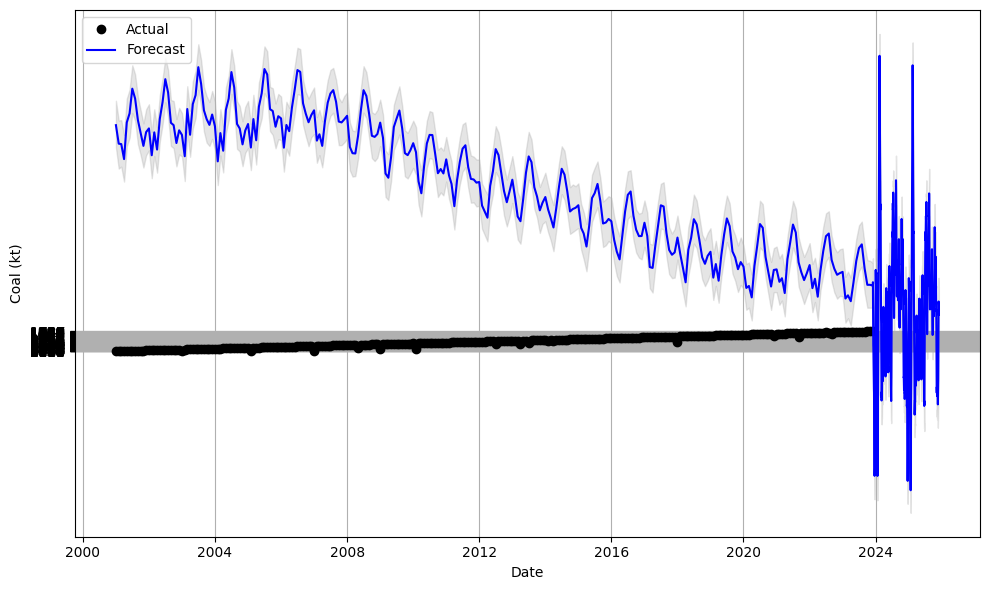

In [46]:
# Plot the forecast
model.plot(forecast)

# Plot the forecast
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual values
ax.plot(filtered_df['ds'], filtered_df['y'], 'ko', label='Actual')

# Plot the forecast
ax.plot(forecast['ds'], forecast['yhat'], 'b-', label='Forecast')

# Plot the uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)

# Customize the plot ax.set_title('Customized Forecast Plot')
ax.set_xlabel('Date')
ax.set_ylabel('Coal (kt)')
ax.legend()

plt.grid()
plt.tight_layout()
plt.show()